There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

Libraries

In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


Read and understand data

In [2]:
#Reading the csv file  used car data.csv 
data_path=('used_cars_data.csv')
df=pd.read_csv(data_path,index_col=0)
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring 

There are 7253 rows and 13 columns


In [3]:
# inspect data, print top 5 
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [4]:
# bottom 5 rows:
cars.tail(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,NaN


In [5]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values

Rows     :  7253
Columns  :  13
######################################## 
 Features : 

 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64
######################################## 
Percent of missing :

 Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.03000
Engine               0.63000
Power              

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<Axes: >

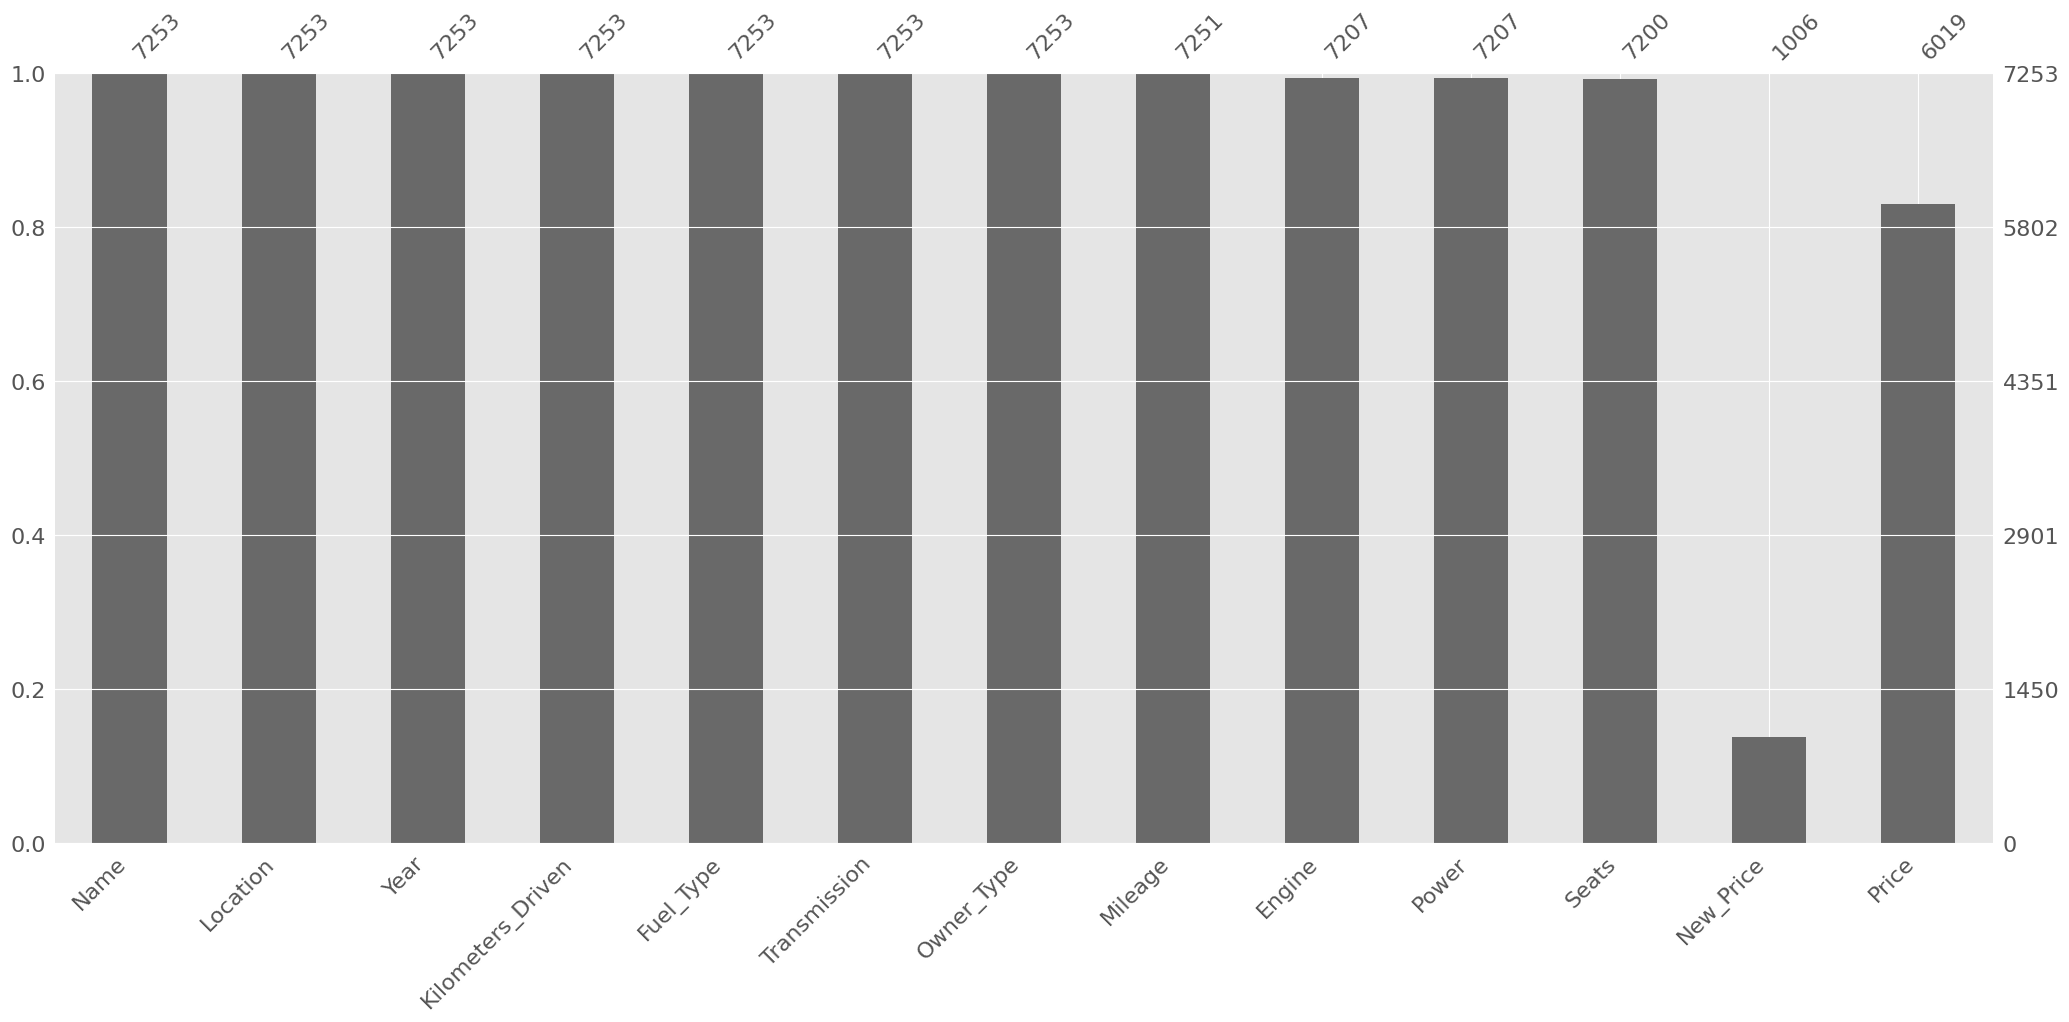

In [8]:
#Visualize missing values
msno.bar(cars)

Observations

This preview shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later.
New_Price has only 1006 values. 86 % values are missing

Price, which is a Target variable 17 % missing values.This needs to be analysed further.

Seats has only 53 values missing and number of seats can be one of key factor in deciding price.

Power and Engine has 46 missing values.

Mileage only has two values missing.

Mileage,Power,Engine,New_Price we know are quantitative variables but are of object dtype here and needs to to converted to numeric.



In [9]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
########################################
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
########################################
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
########################################
Seats
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: count, dtype: int64
########################################
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2

Observations

Maximum car being sold have fuel type as Diesel.
Mumbai has highest numbers of car availabe for purchase.
5204 cars with Manual transmission are available for purchase.
Most of the cars are 5 seaters and First owned.
Years of car ranges form 1996- 2015
Data Preprocessing
Processing Engine,Power ,Mileage columns
Datatype for Engine ,Power and Mileage are object because of unit assigned ,so striping units.

In [10]:
#np.random.seed(9)
cars[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
S.No.,,,
3474,1199 CC,74 bhp,16.2 kmpl
1506,1598 CC,102.5 bhp,12.9 kmpl
6225,2143 CC,167.62 bhp,19.27 kmpl
1557,1498 CC,98.6 bhp,26.0 kmpl
4263,1591 CC,121.3 bhp,15.29 kmpl
6488,1896 CC,105 bhp,17.0 kmpl
5933,1396 CC,88.76 bhp,21.9 kmpl
7224,1198 CC,67 bhp,19.83 kmpl
6382,1497 CC,118 bhp,17.0 kmpl


In [11]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,NaN,2.35000
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,3.25000
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,NaN,1.40000
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,NaN,4.70000
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00000,NaN,2.10000
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00000,NaN,1.90000
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00000,NaN,2.85000
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00000,NaN,1.45000


Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

Mileage

In [12]:
cars[cars.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [13]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")

Engine

In [14]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")

Power

In [15]:
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [16]:
#verify the data
num=['Engine','Power','Mileage']
cars[num].sample(20)

,Engine,Power,Mileage
S.No.,,,
6487,1984,208,9.74
4478,1399,68,17.7
3279,1086,62.1,17.92
3427,1399,68.05,20.0
627,1396,88.76,21.27
6267,1197,81.86,18.9
3777,1197,81.80,21.5
1090,1968,174.33,15.73
2876,1968,187.74,18.53


I had seen some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [17]:
cars.query("Power == '0.0'")['Power'].count()

0

In [18]:
cars.query("Mileage == '0.0'")['Mileage'].count()

81

Converting this observations to Nan so we will remember to handle them when handling missing values.

In [19]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

In [20]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

0

In [21]:
cars[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [22]:
cars[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

There are 46 missing values in Engine, 175 in Power,83 in Mileage.

Processing seats

In [23]:
cars.query("Seats == 0.0")['Seats']

S.No.
3999   0.00000
Name: Seats, dtype: float64

In [24]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan

Processing New Price
We know that New_Price is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.

In [25]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)


The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [26]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5)  # Looks ok

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN


Feature Enginering

converting data type

In [27]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [28]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


Processing Years to Derive Age of car
Since year has 2014, 1996 etc. But this will not help to understand how old cars is and its effect on price. so creating two new columns current year and Age . Current year would be 2021 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns

In [29]:
cars['Current_year']=2021
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,8


Processing Name column
Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [30]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]

In [31]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [32]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
3839,Land Rover Discovery 3 TDV6 Diesel Automatic,Pune,2012,117236,Diesel,Automatic,Second,11.80000,2720.00000,190.00000,7.00000,NaN,14.00000,NaN,9,Land,RoverDiscovery
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39000,2179.00000,147.51000,5.00000,NaN,19.25000,NaN,9,Land,RoverFreelander
6426,Land Rover Range Rover HSE,Hyderabad,2015,30000,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,NaN,NaN,6,Land,RoverRange
391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86000,1598.00000,122.00000,4.00000,NaN,32.00000,NaN,6,Mini,CooperConvertible
2073,Mini Cooper 5 DOOR D,Hyderabad,2017,2000,Diesel,Automatic,First,20.70000,1496.00000,113.98000,5.00000,42.48 Lakh,34.00000,42.48000,4,Mini,Cooper5


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7253 non-null   int64   
 15  Brand              7253 non-null   object  
 16  Model      

In [34]:
#changing brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [35]:
cars.Brand.nunique()

32

In [36]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [37]:
cars.Model.isnull().sum()

1

In [38]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [39]:
cars.Model.nunique()

726

In [40]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

EDA

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   object  
 16  Model      

In [42]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.00000,7252.00000,7169.00000,7206.00000,7077.00000,7198.00000,6019.00000,1006.00000,7252.00000
mean,2013.36652,58700.26269,18.34711,1616.60505,112.76871,5.28049,9.47947,22.77969,7.63348
std,3.25316,84433.48037,4.15791,595.32041,53.49652,0.80938,11.18792,27.75934,3.25316
min,1996.00000,171.00000,6.40000,72.00000,34.20000,2.00000,0.44000,3.91000,2.00000
25%,2011.00000,34000.00000,15.30000,1198.00000,75.00000,5.00000,3.50000,7.88500,5.00000
50%,2014.00000,53429.00000,18.20000,1493.00000,94.00000,5.00000,5.64000,11.57000,7.00000
75%,2016.00000,73000.00000,21.10000,1968.00000,138.10000,5.00000,9.95000,26.04250,10.00000
max,2019.00000,6500000.00000,33.54000,5998.00000,616.00000,10.00000,160.00000,375.00000,25.00000


Observations
Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

Mileage is almost Normally distrubuited

Engine is right skewed and has outliers on higher and lower end

Power and Price are also right skewed.

Price 160 Lakh is too much for a used car. Seems to be an outlier.

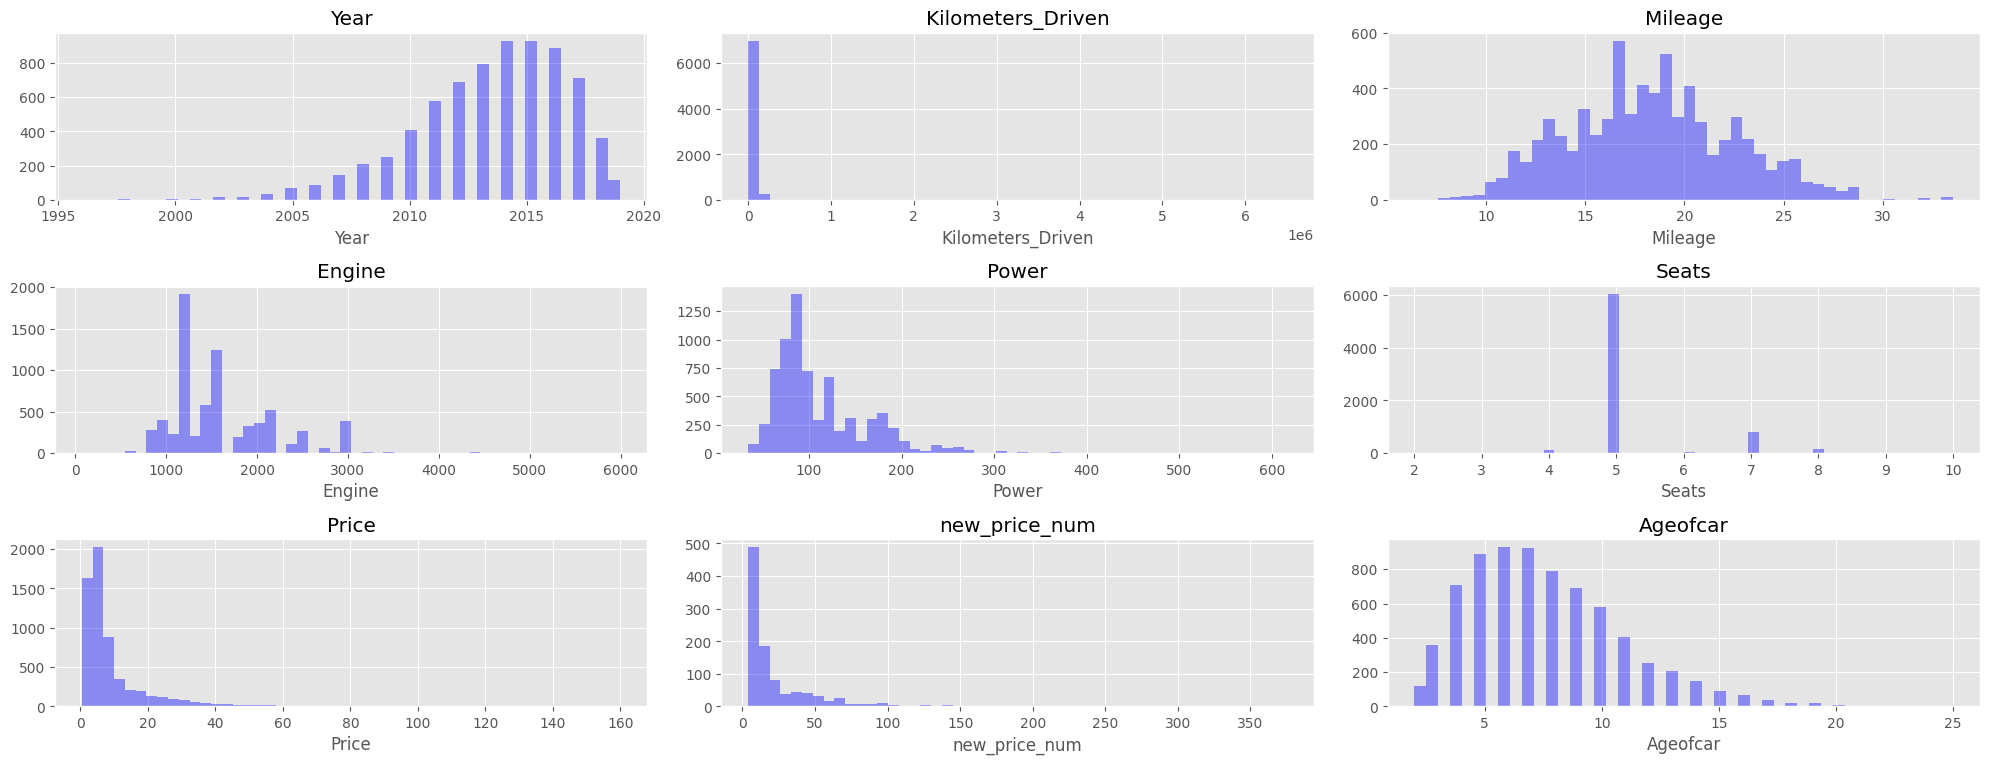

In [43]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

Observations

Year is left skewed and has outilers on lower side., This column can be dropped
Kilometer_driven is right skewed.
Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
Engine ,power and price are right skewed and has outliers on upper side.
Age of car is right skewed.

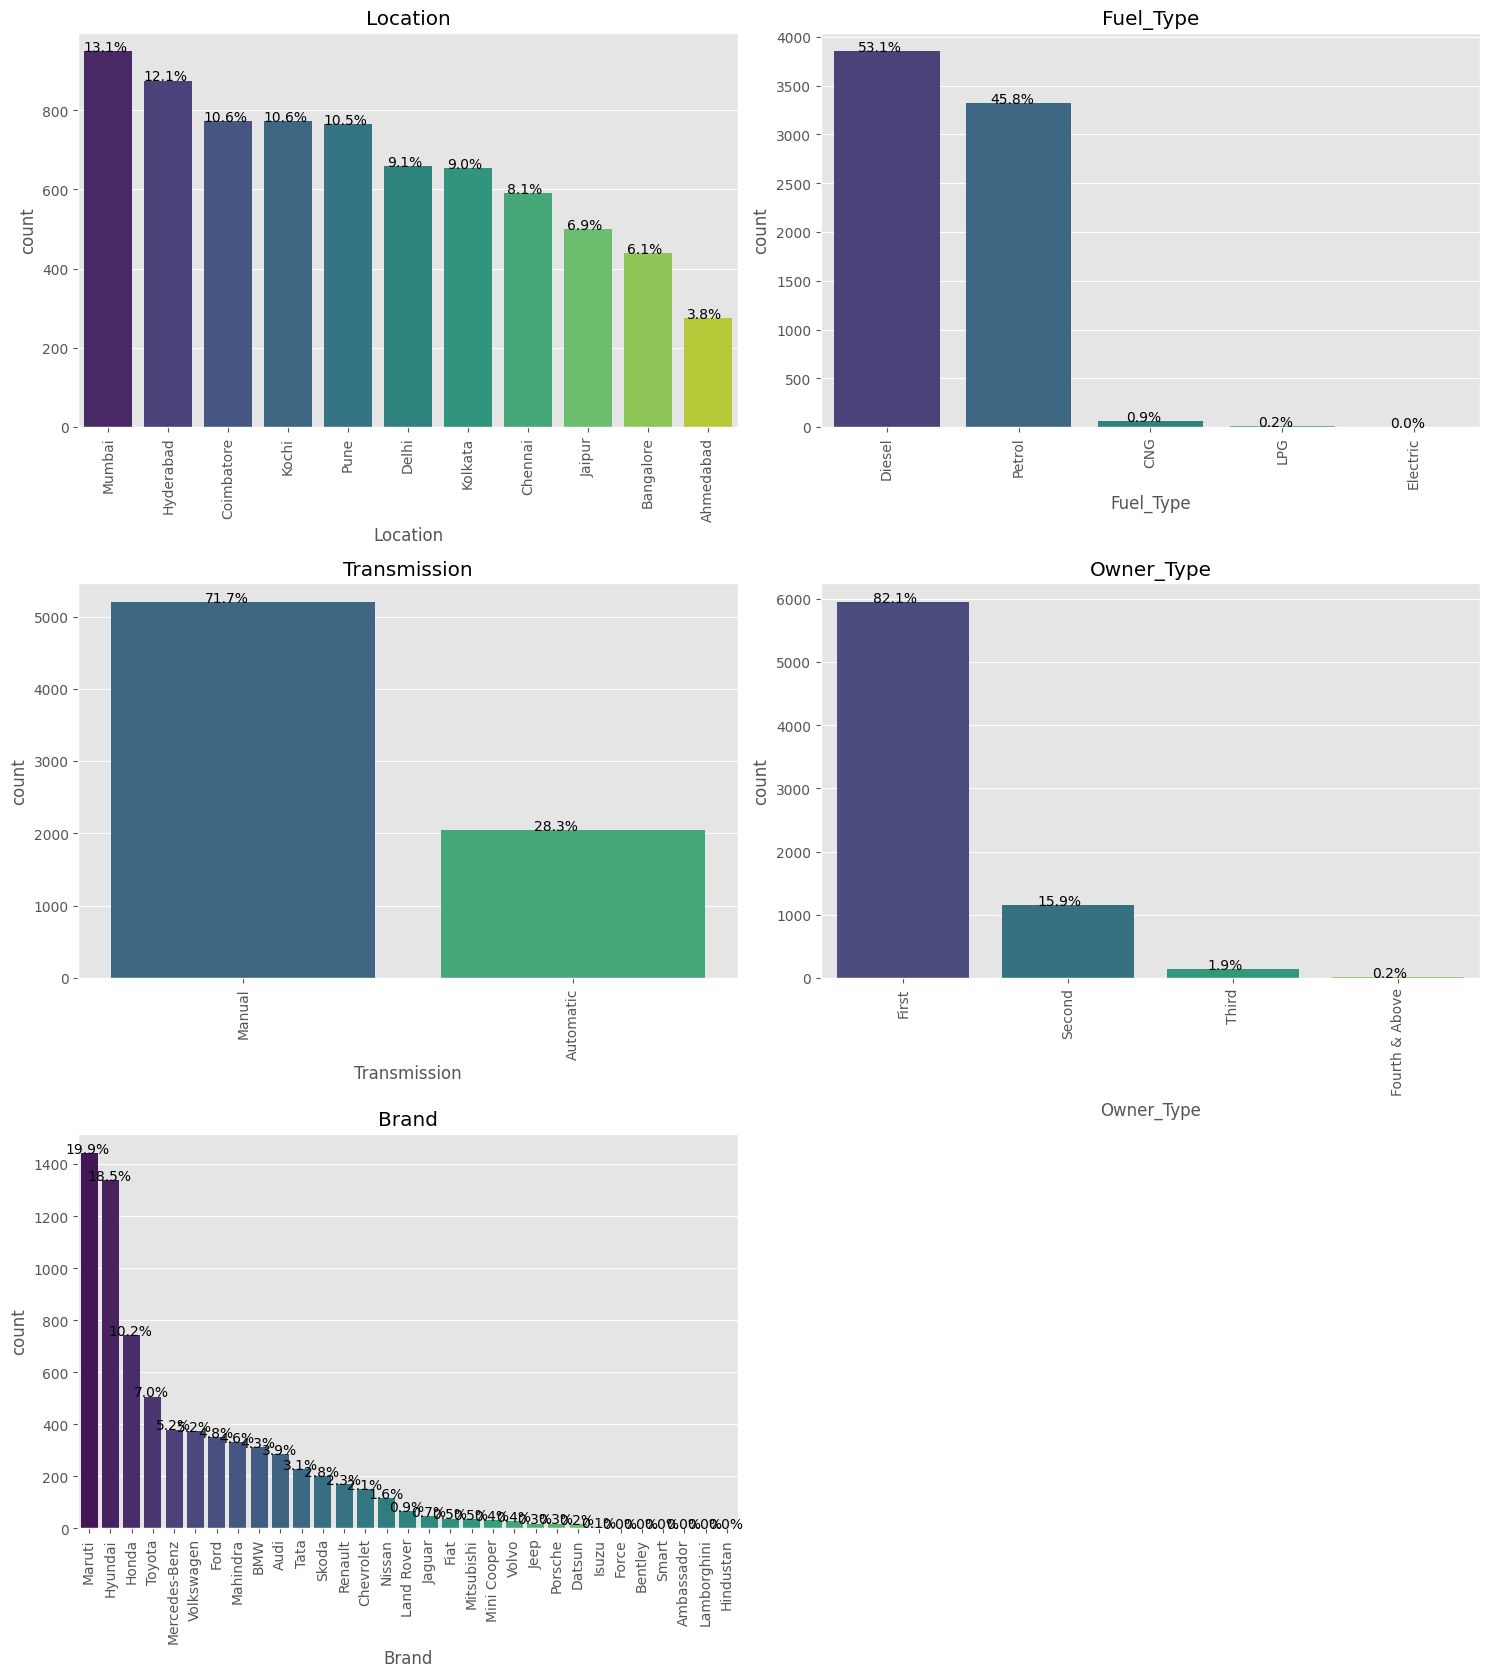

In [44]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                      
                         percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

Observations

Car Profile

~71 % cars available for sell have manual Transmission.
~82 % cars are First owned cars.
~39% of car available for sale are from Maruti & Hyundai brands.
~53% of car being sold/avialable for purchase have fuel type as Diesel .
Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
Most of the cars are 5 seaters.
Car being sold/available for purchase are in 2 - 23 years old
~ 71% car are lower price range car.

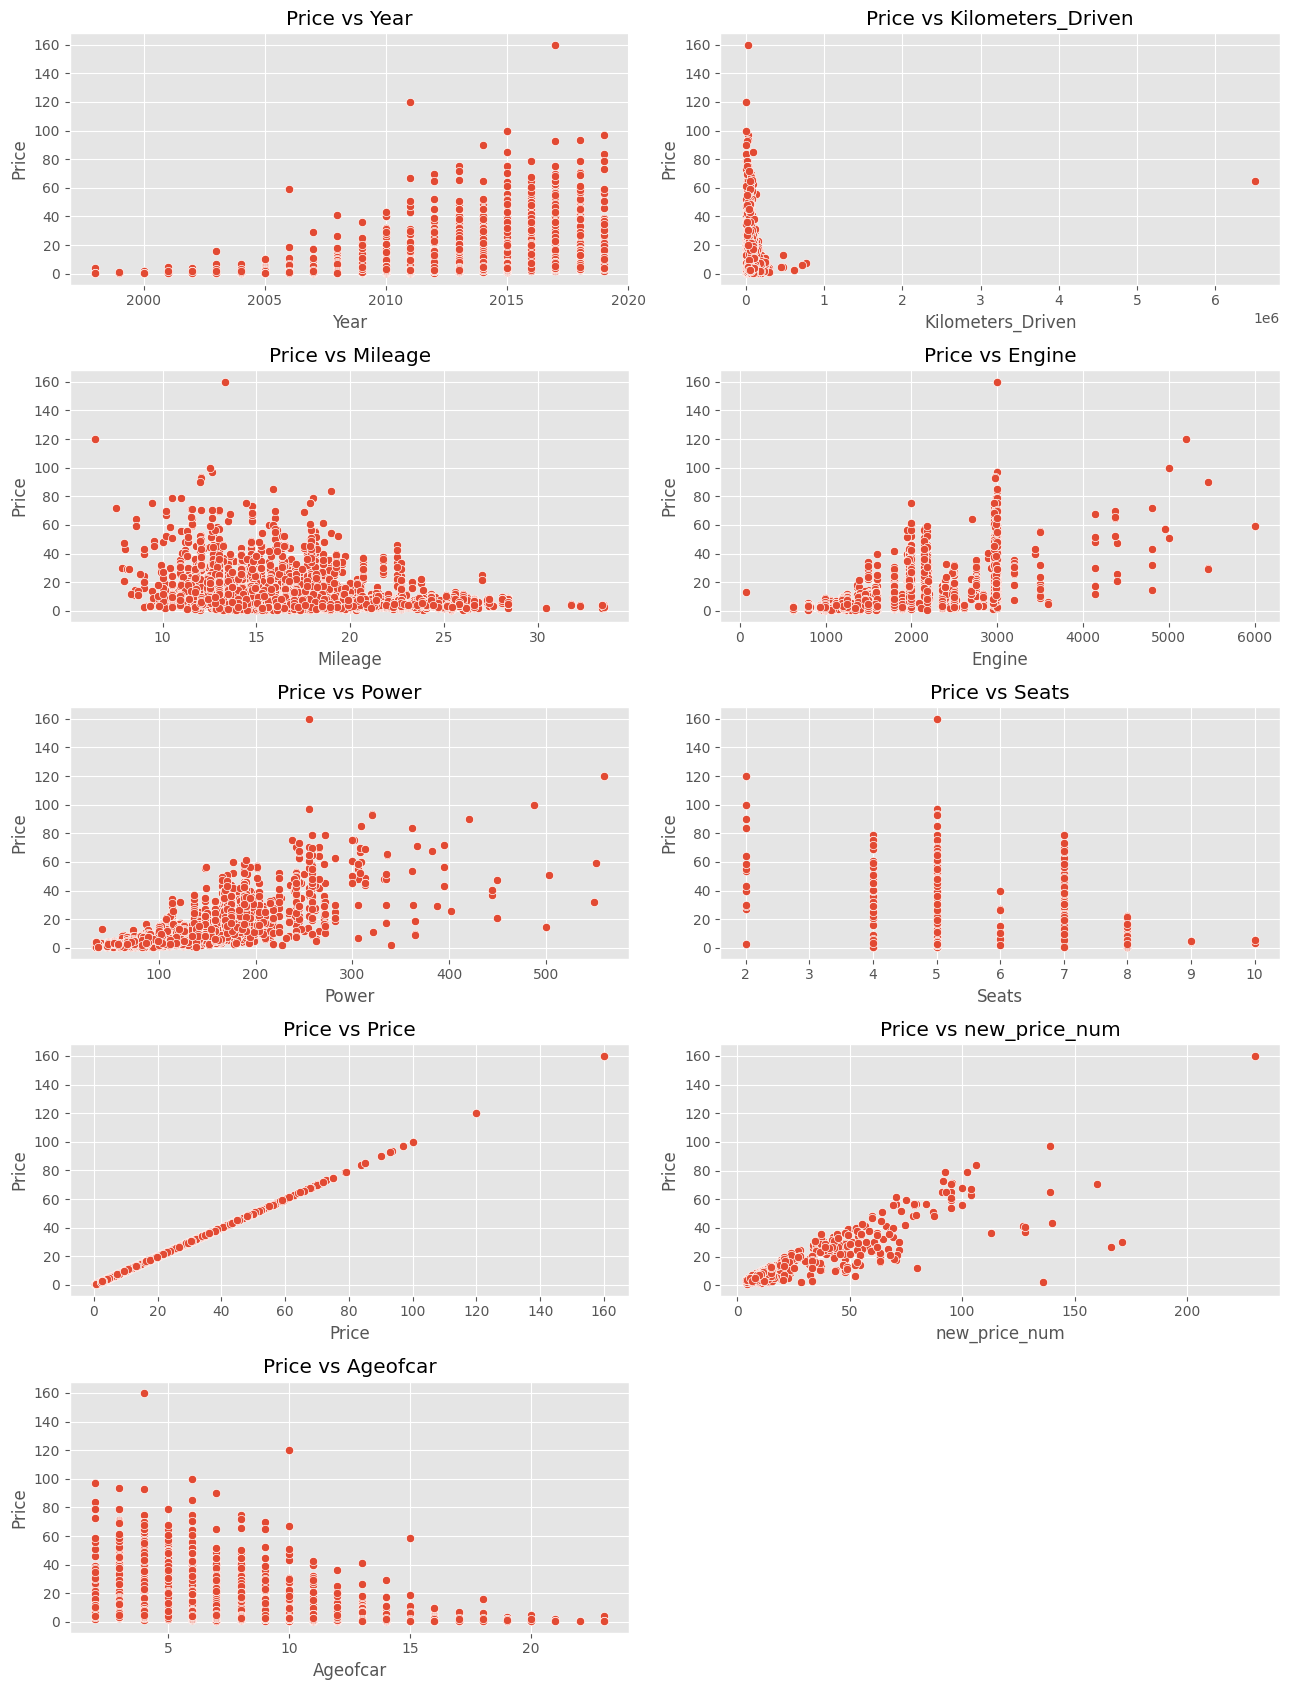

In [45]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

Handling Missing Values

In [46]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

Calculate missing values in each row

In [47]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [48]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


In [49]:
cars[num_missing==7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Mahindra,TUV300


In [50]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

We can start filling missing values by grouping name and year and fill in missing values. with median.

In [51]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

In [52]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [53]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [54]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

mean       max    median
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 181.03333 187.74000 187.74000
           1968.00000 167.12318 187.74000 174.33000
           1984.00000 196.02200 226.60000 207.90000
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 241.74000 246.70000 241.40000

In [55]:
cars['Seats'].isnull().sum()

54

Lets check which car types have missing values.

In [56]:
cars[cars['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95000,NaN,14,Honda,City1.5
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,2.11000,NaN,11,Maruti,Swift1.3
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,1498.00000,99.00000,NaN,NaN,3.60000,NaN,6,Ford,FigoDiesel
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,15,Maruti,Swift1.3
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50000,NaN,13,Land Rover,RoverRange
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80000,NaN,NaN,NaN,NaN,3.20000,NaN,12,Honda,City1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,5.80000,NaN,6,Maruti,Swift1.3
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,NaN,1.50000,NaN,17,Honda,City1.5
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,40.88000,NaN,13,Land Rover,RoverRange


In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   object  
 16  Model      

processing new prices

In [58]:
cars.new_price_num.isnull().sum()

6246

In [59]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Porsche         136.00000
Land Rover      120.00000
Mercedes-Benz    78.76000
BMW              58.67000
Audi             55.61000
Jaguar           53.72000
Volvo            45.67000
Mini Cooper      42.12000
Isuzu            33.68000
Mitsubishi       33.21000
Skoda            31.36500
Toyota           23.25000
Jeep             22.95000
Ford             11.20000
Honda            11.15000
Mahindra         11.14500
Volkswagen       11.10500
Hyundai           9.74000
Nissan            9.51000
Fiat              8.95500
Maruti            7.87000
Tata              7.63000
Renault           4.93000
Datsun            4.37000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [60]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [61]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [62]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [63]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,11,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,6,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,10,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,9,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,8,Audi,A4New


In [64]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [65]:
df.shape 

(7253, 13)

In [71]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,mean,max,median
Brand,,,
Ambassador,1.35000,1.35000,1.35000
Audi,25.53771,72.94000,23.50000
BMW,25.24315,93.67000,21.00000
Bentley,59.00000,59.00000,59.00000
Chevrolet,3.04446,9.87000,2.50000
Datsun,3.04923,3.95000,3.10000
Fiat,3.26929,7.71000,2.60000
Force,9.33333,12.00000,8.00000
Ford,6.88940,56.80000,5.34500


Bivariate and multivariate analysis

Observations

Engine has strong positive correlation to Power [0.86].
Price has positive correlation to Engine[0.66] as well Power [0.77].
Mileage is negative correlated to Engine,Power,Price.,Ageofcar
Price has negative correlation to age of car.
Kilometer driven doesnt impact Price


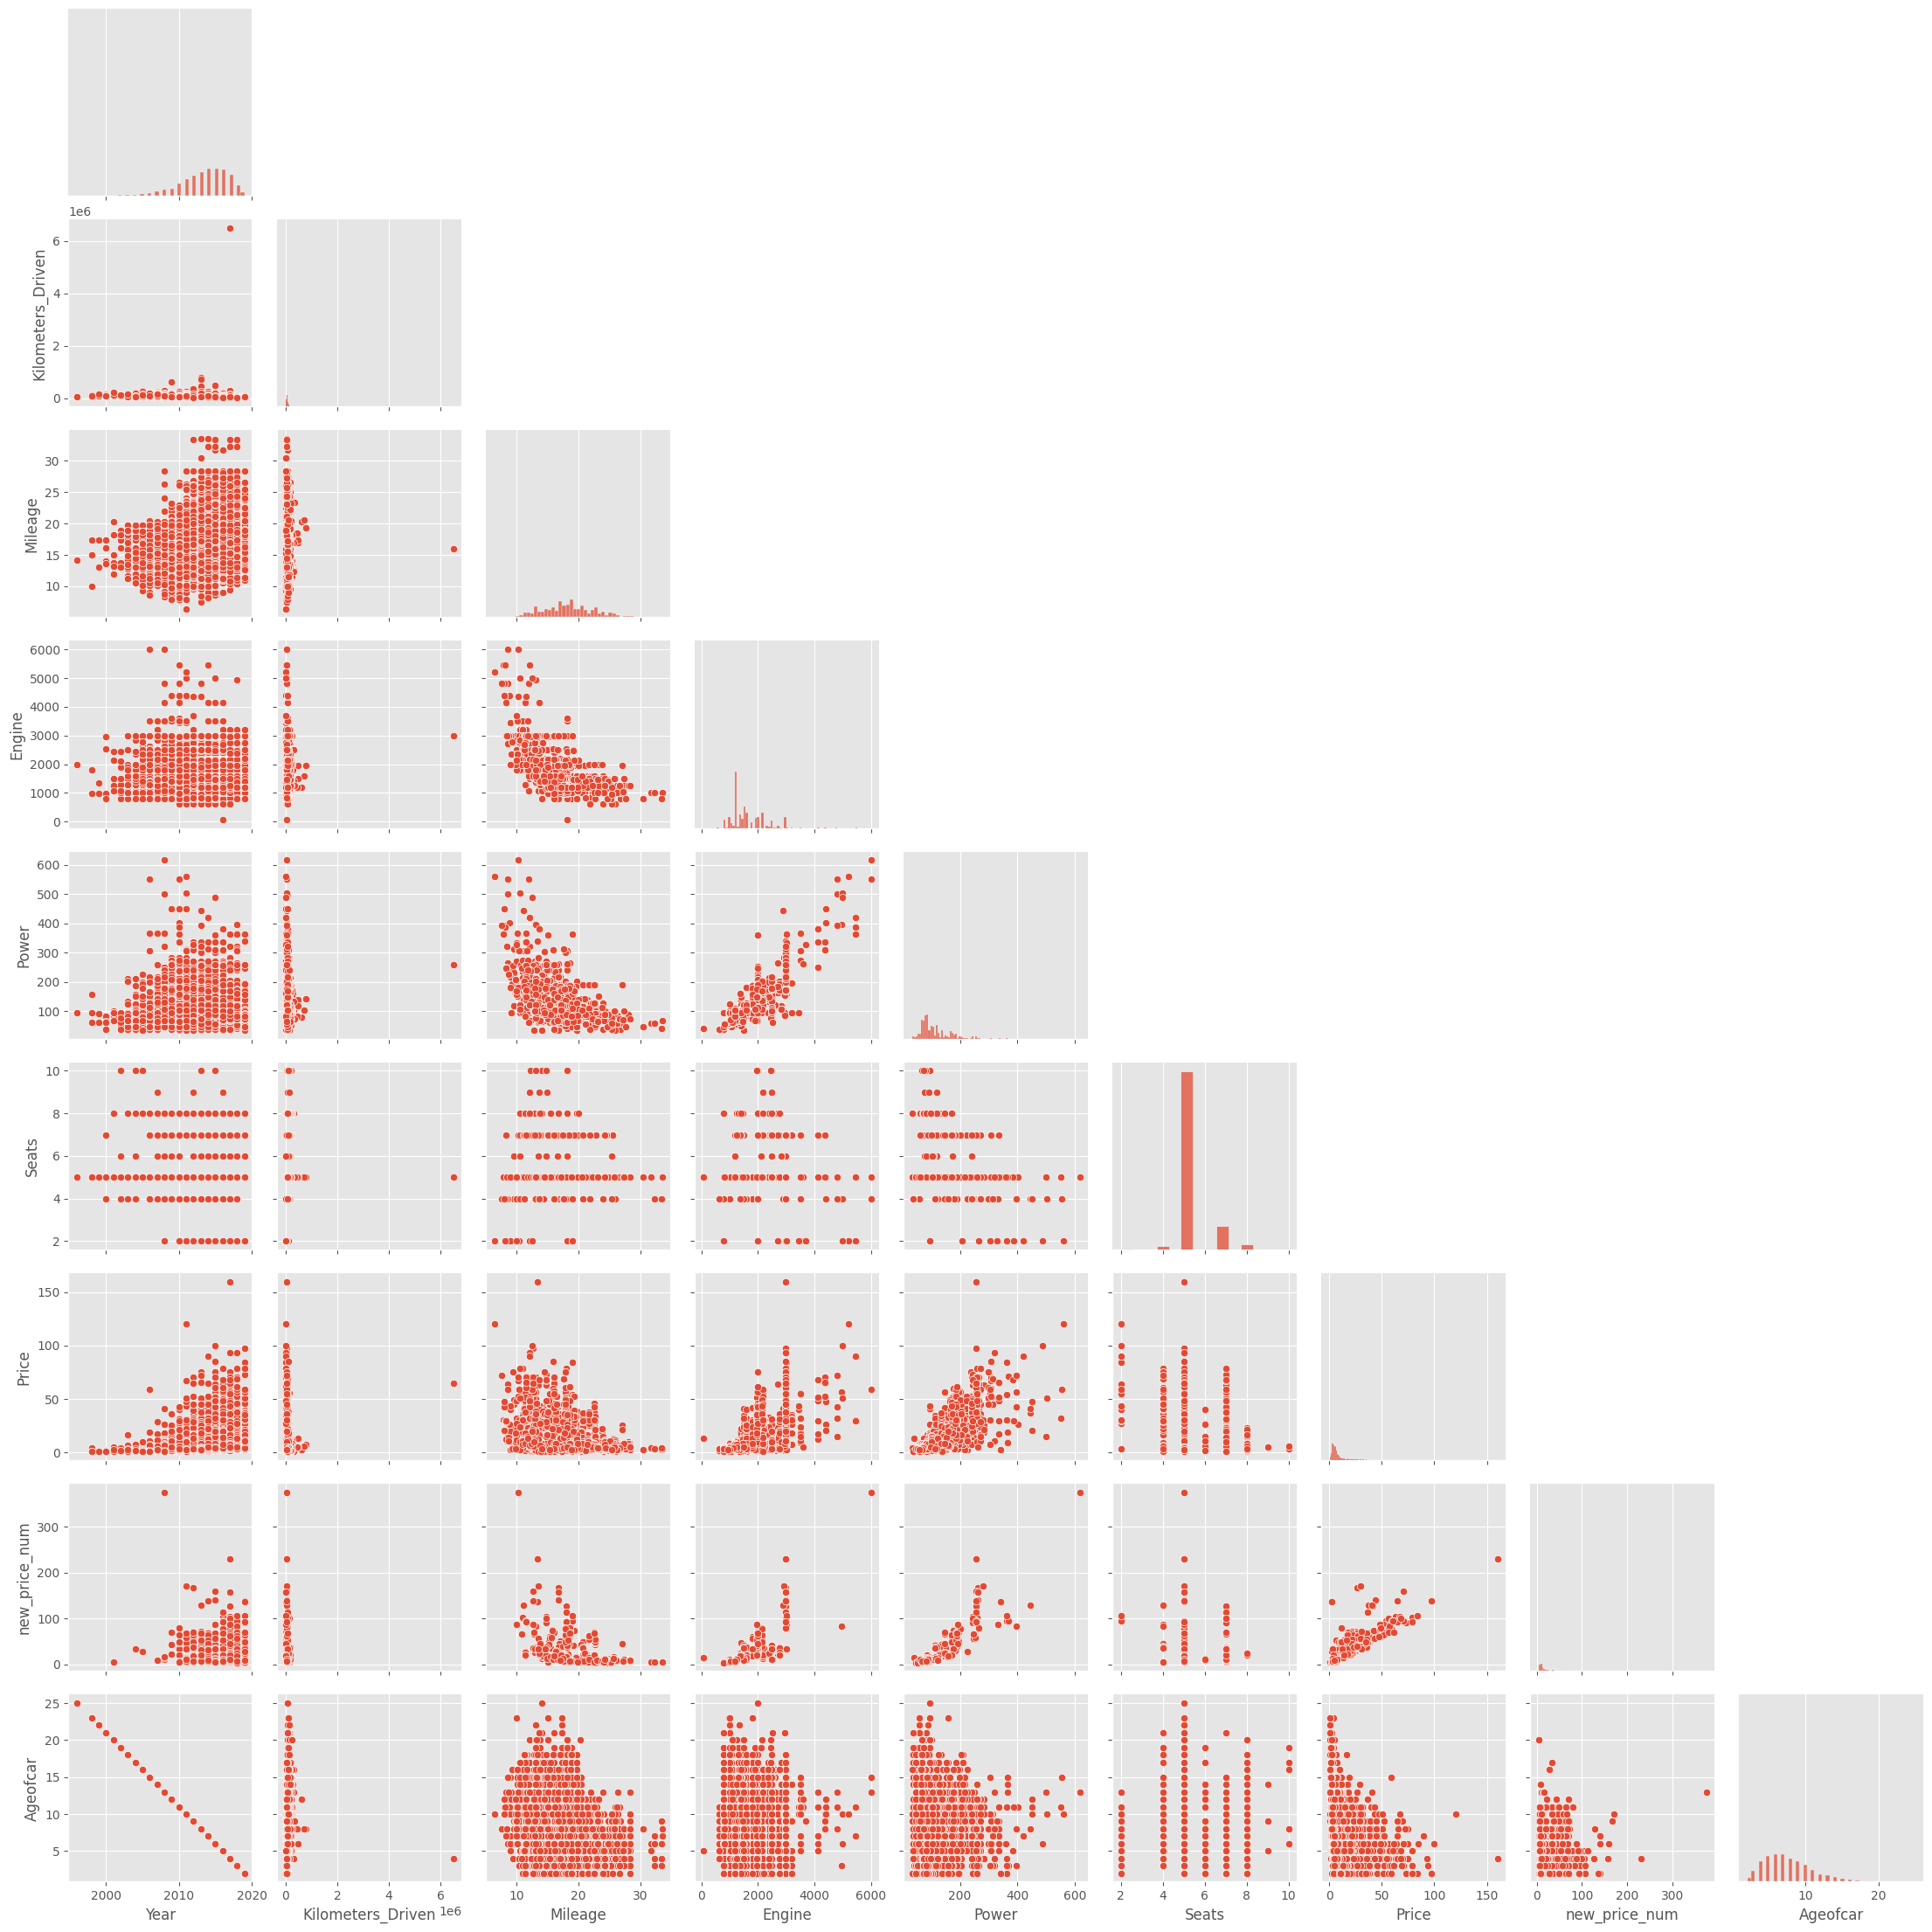

In [68]:
sns.pairplot(data=cars , corner=True)
plt.show()

Observations

Same observation about correlation as seen in heatmap.

Kilometer driven doesnot have impact on Price .

As power increase mileage decrease.
Car with recent make sell at higher prices.
Engine and Power increase , price of the car seems to increase.
Variables that are correlated with Price variable
Price Vs Engine Vs Transmission


<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

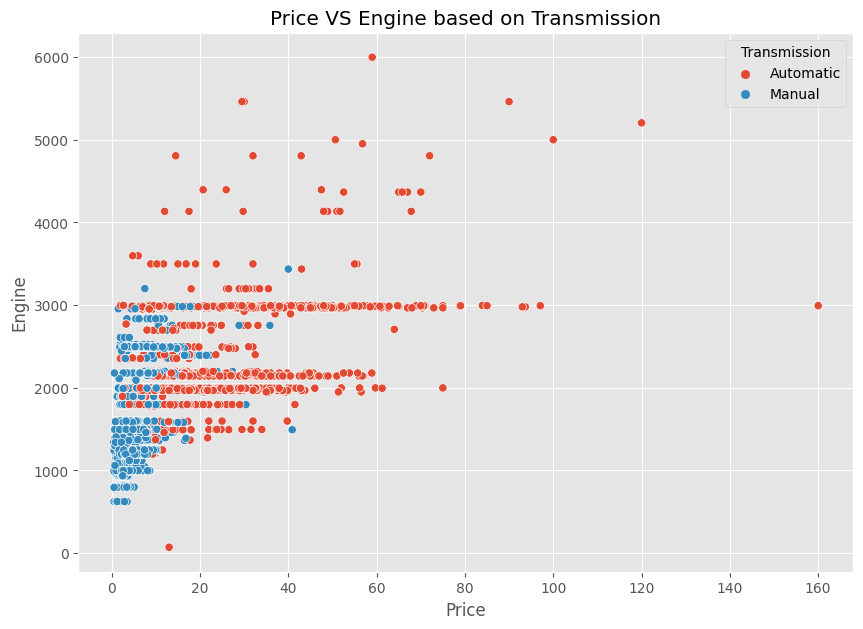

In [72]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

Price Vs Power vs Transmission

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

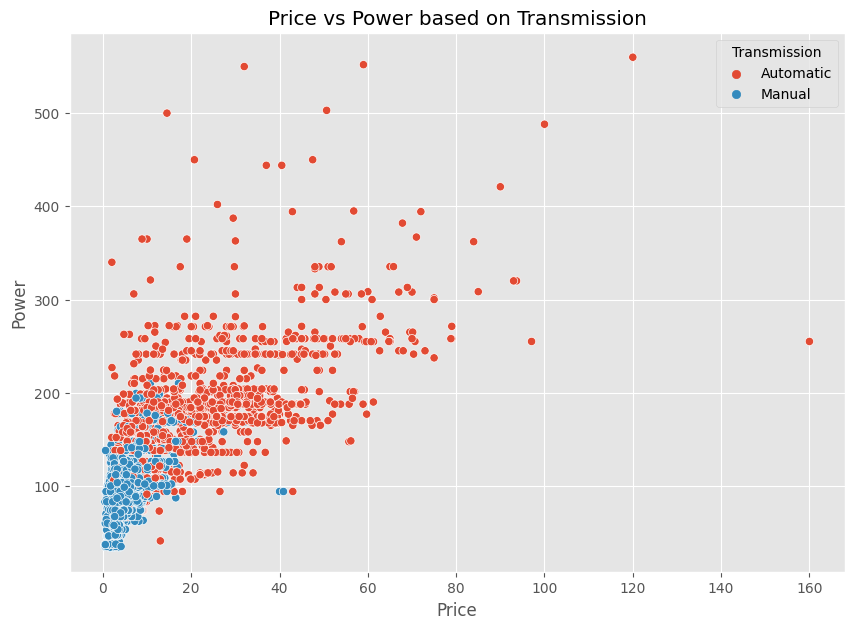

In [73]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

Price Vs Mileage Vs Transmission

<Axes: xlabel='Price', ylabel='Mileage'>

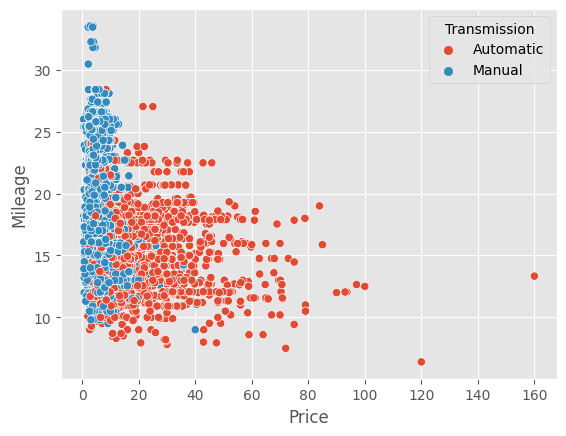

In [75]:
 #Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

Price Vs Year Vs Transmission

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

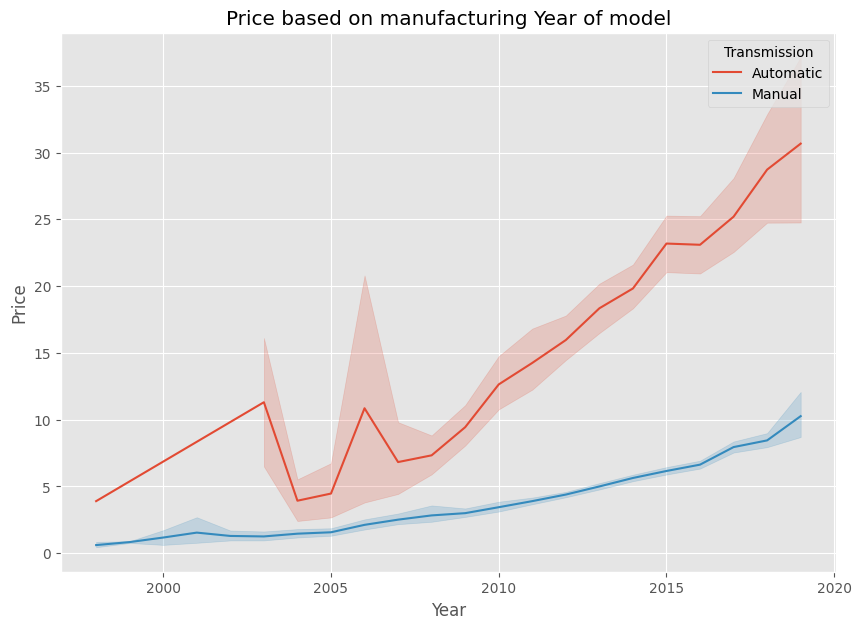

In [76]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=cars)

Price Vs Year VS Fuel Type

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

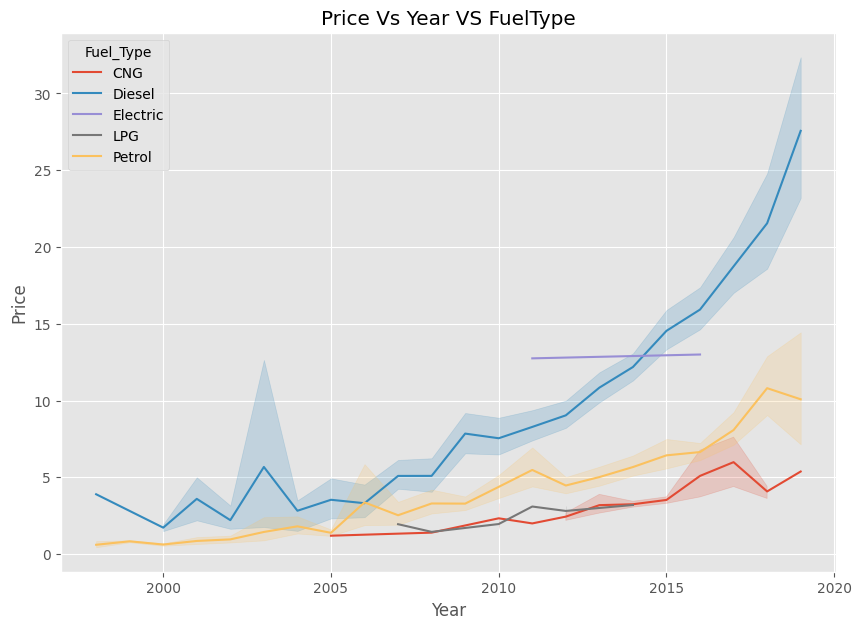

In [77]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

Year Vs Price Vs Owner_Type

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

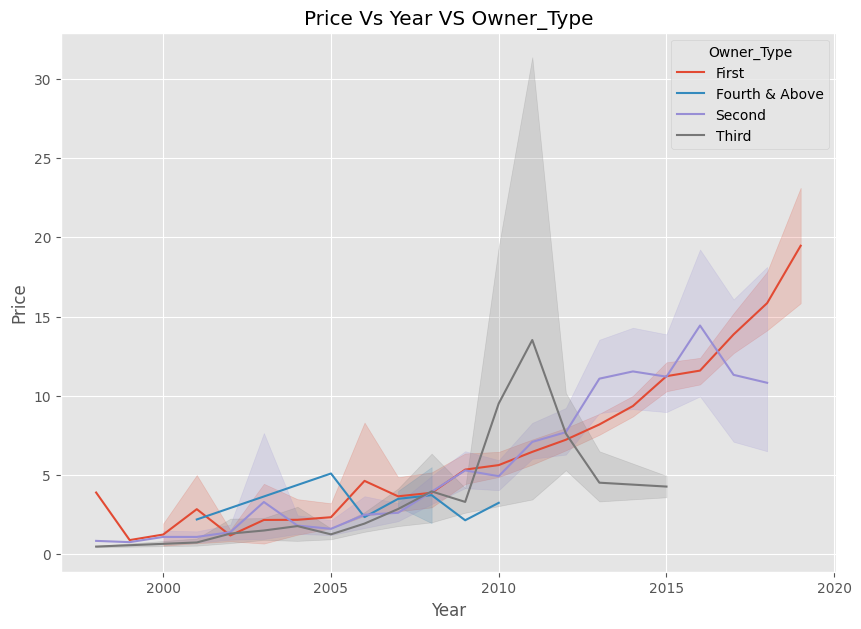

In [78]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=cars)

Need to check the reason for spike in price for third owner and model in 2010.

In [79]:
cars[(cars["Owner_Type"]=='Third') & (cars["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00000,4806.00000,394.30000,4.00000,NaN,42.91000,NaN,11,Porsche,Panamera2010
5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48000,1995.00000,177.00000,5.00000,NaN,12.00000,NaN,11,BMW,5Series
3293,Toyota Innova 2.5 GX 7 STR,Pune,2010,140000,Diesel,Manual,Third,12.80000,2494.00000,102.00000,7.00000,NaN,6.25000,NaN,11,Toyota,Innova2.5
4962,Mahindra Scorpio VLX,Bangalore,2010,144400,Diesel,Manual,Third,12.05000,2179.00000,120.00000,8.00000,NaN,5.25000,NaN,11,Mahindra,ScorpioVLX
3479,Volkswagen Passat 1.8 TSI MT,Mumbai,2010,60000,Petrol,Manual,Third,14.30000,1798.00000,160.00000,5.00000,NaN,3.50000,NaN,11,Volkswagen,Passat1.8
1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.10000,1298.00000,88.20000,5.00000,NaN,2.50000,NaN,11,Maruti,SwiftLxi
5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47000,1198.00000,73.90000,5.00000,NaN,2.44000,NaN,11,Volkswagen,PoloPetrol
698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.00000,1399.00000,68.00000,5.00000,NaN,1.28000,NaN,11,Ford,FigoDiesel
6190,Tata Indica Vista Aqua TDI BSIII,Chennai,2010,93600,Diesel,Manual,Third,17.00000,1405.00000,71.00000,5.00000,NaN,NaN,NaN,11,Tata,IndicaVista


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

In [80]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.00000,7252.00000,7252.00000,7252.00000,7252.00000,7198.00000,6019.00000,1006.00000,7252.00000
mean,2013.36652,58700.26269,18.34542,1615.82101,112.31580,5.28049,9.47947,22.77969,7.63348
std,3.25316,84433.48037,4.13408,593.51020,52.92546,0.80938,11.18792,27.75934,3.25316
min,1996.00000,171.00000,6.40000,72.00000,34.20000,2.00000,0.44000,3.91000,2.00000
25%,2011.00000,34000.00000,15.40000,1198.00000,77.00000,5.00000,3.50000,7.88500,5.00000
50%,2014.00000,53429.00000,18.20000,1493.00000,94.00000,5.00000,5.64000,11.57000,7.00000
75%,2016.00000,73000.00000,21.10000,1968.00000,138.03000,5.00000,9.95000,26.04250,10.00000
max,2019.00000,6500000.00000,33.54000,5998.00000,616.00000,10.00000,160.00000,375.00000,25.00000


Price Vs Mileage vs Fuel_type

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

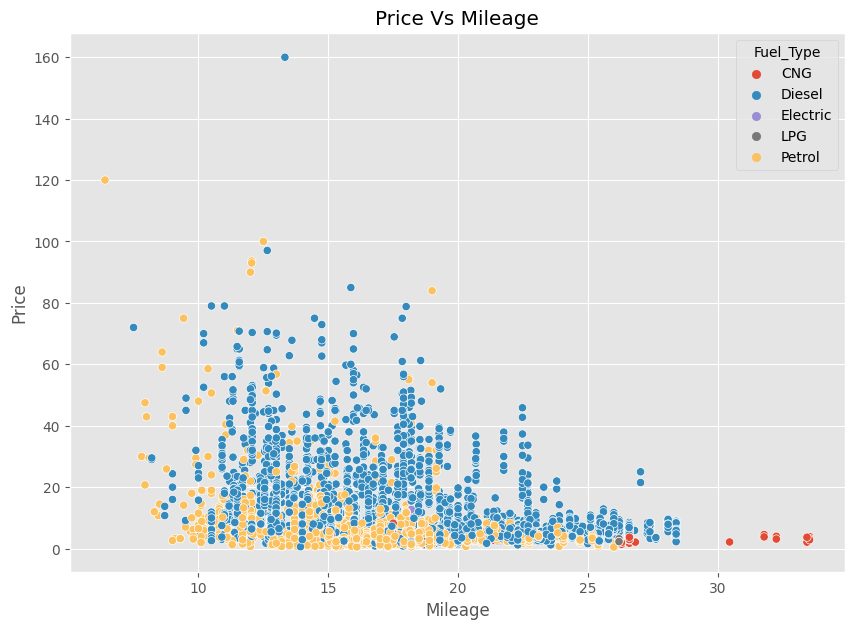

In [81]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

Price Vs Seat¶

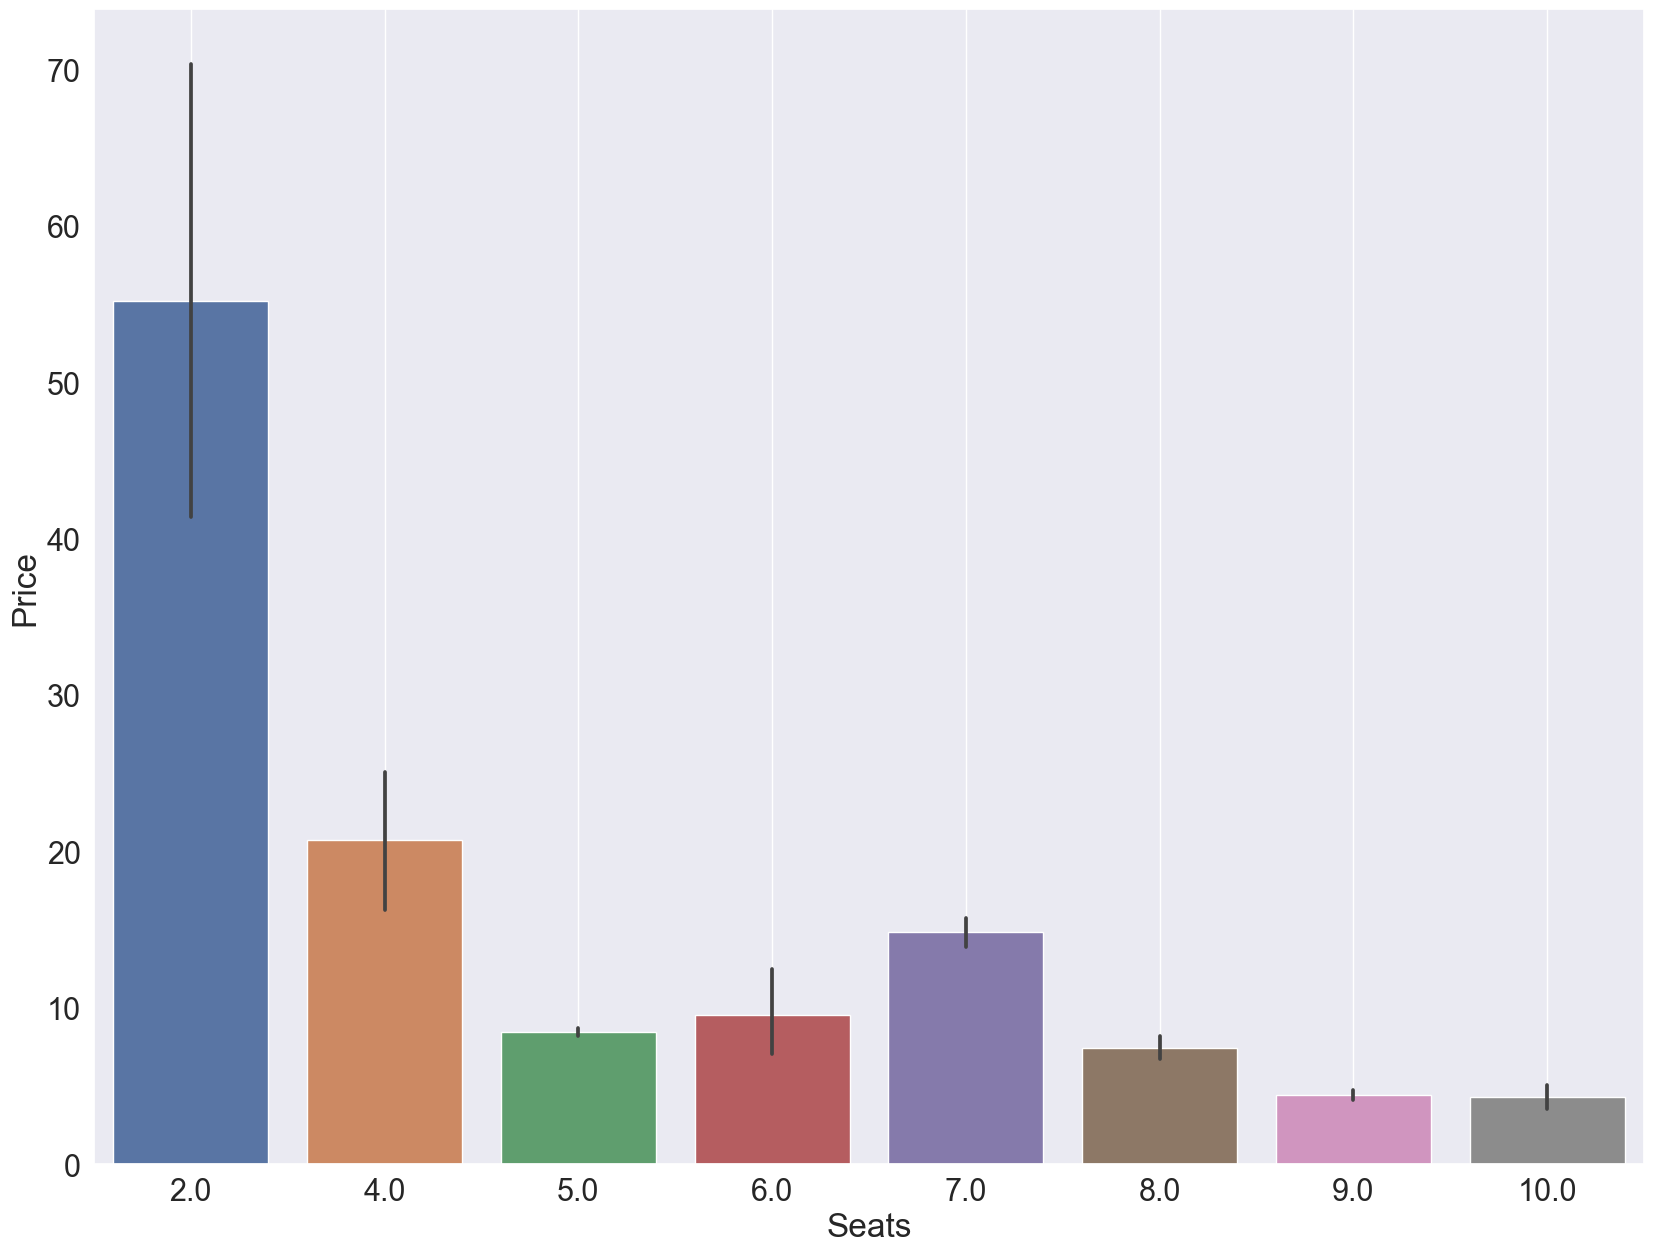

In [82]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

Price Vs Location

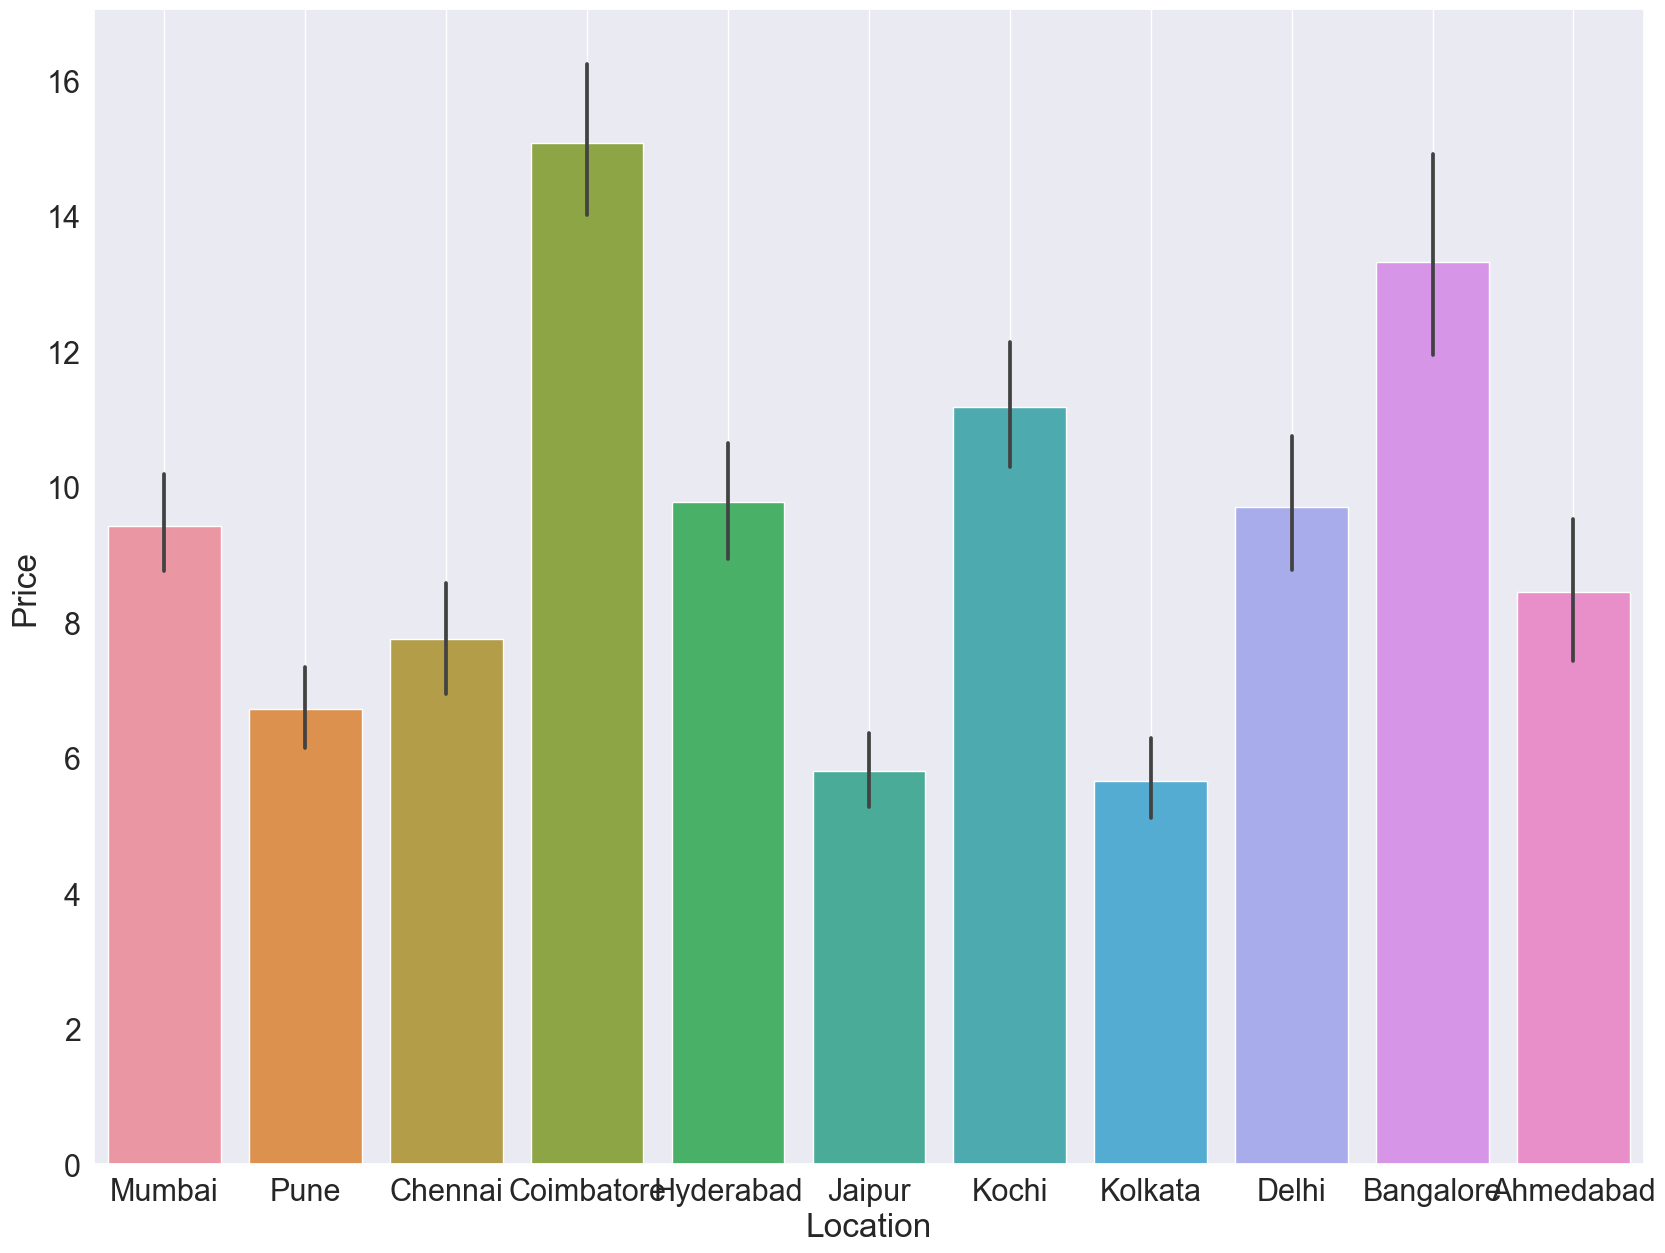

In [83]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

Price Vs Brand

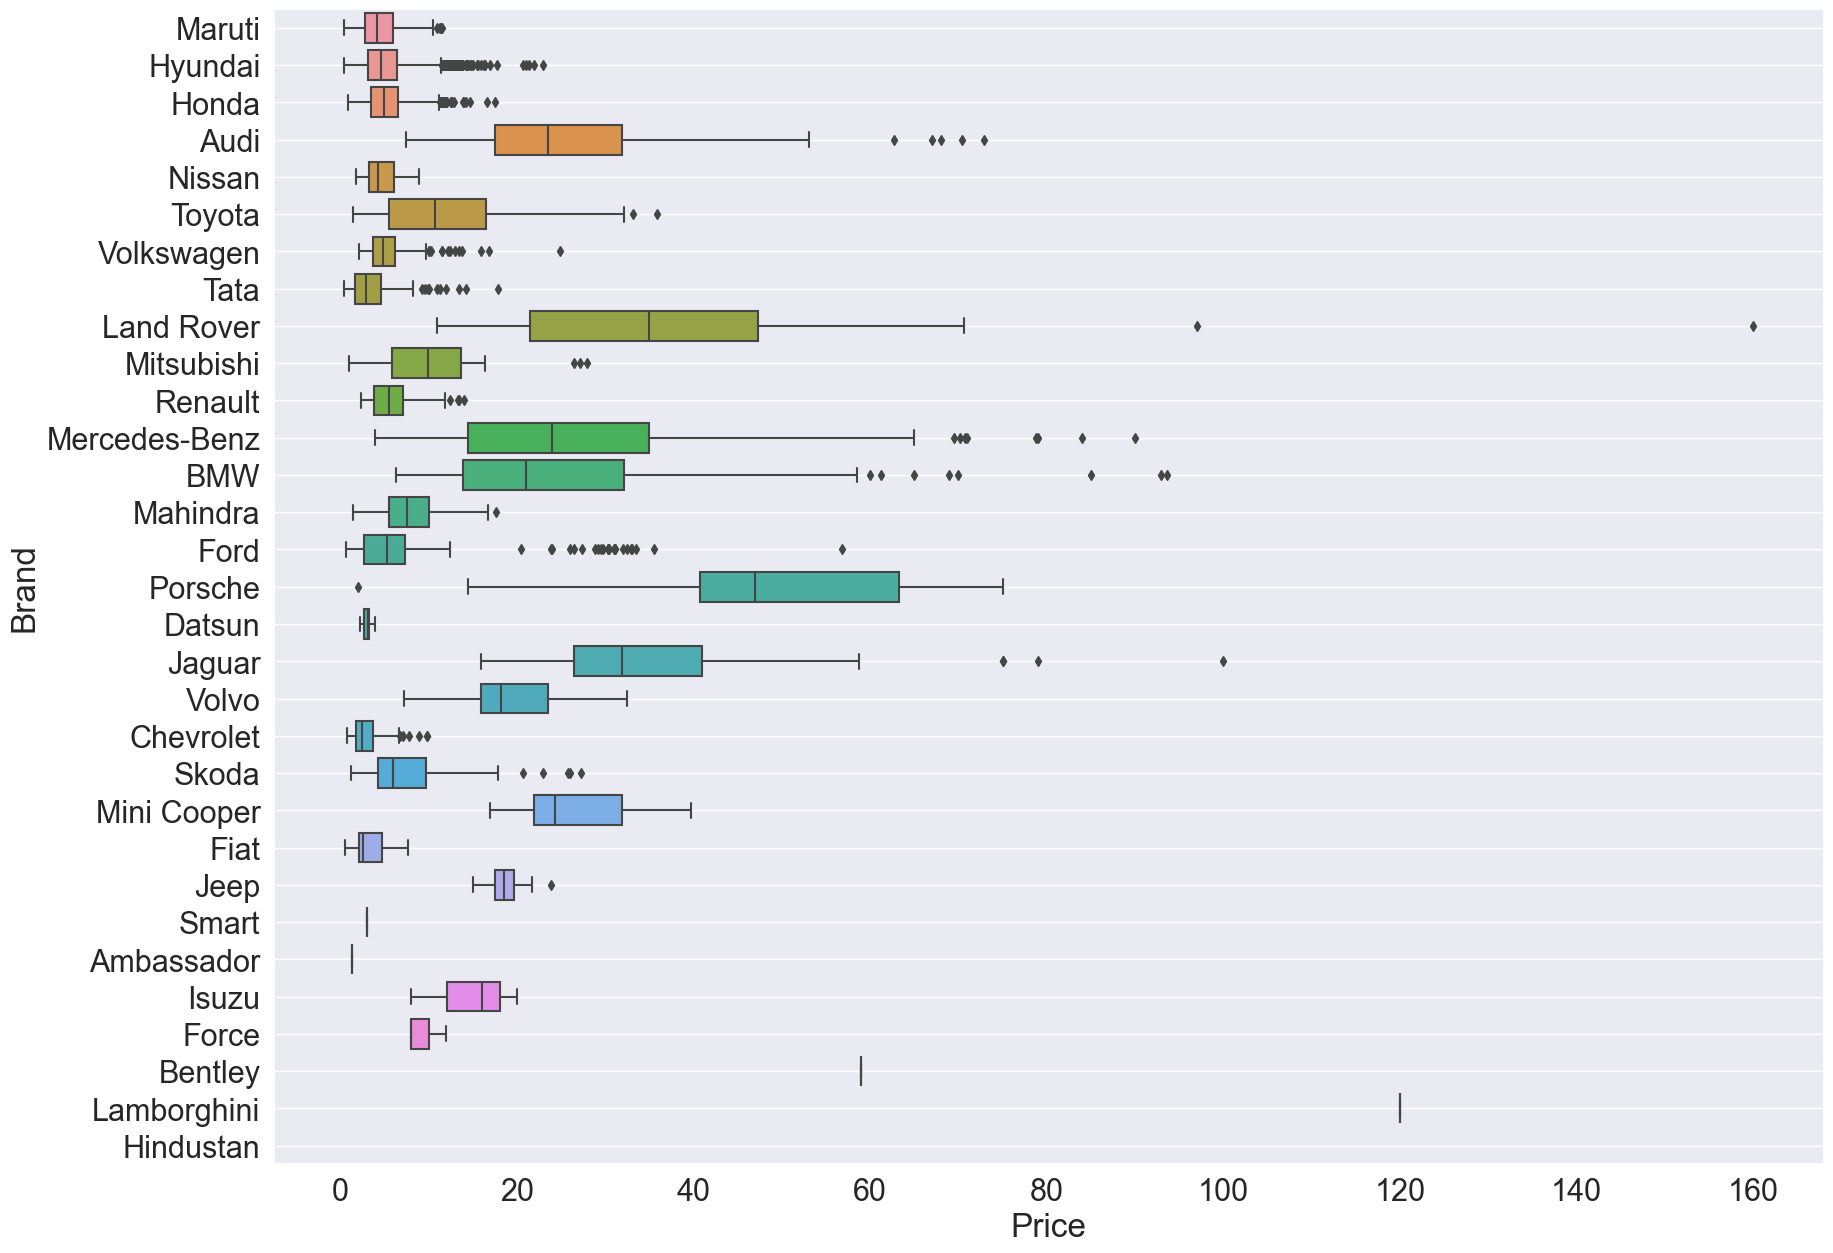

In [84]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

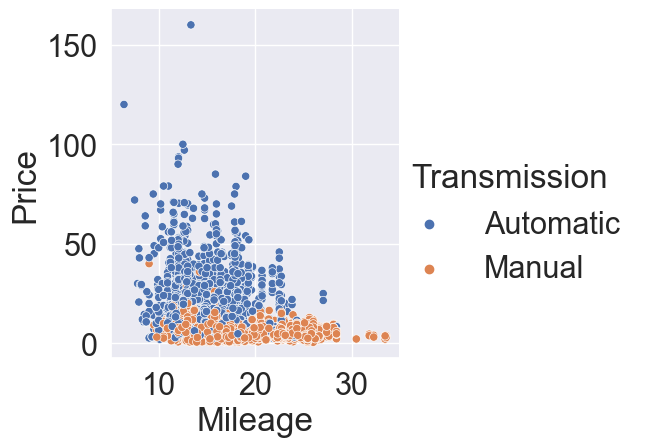

In [85]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5)

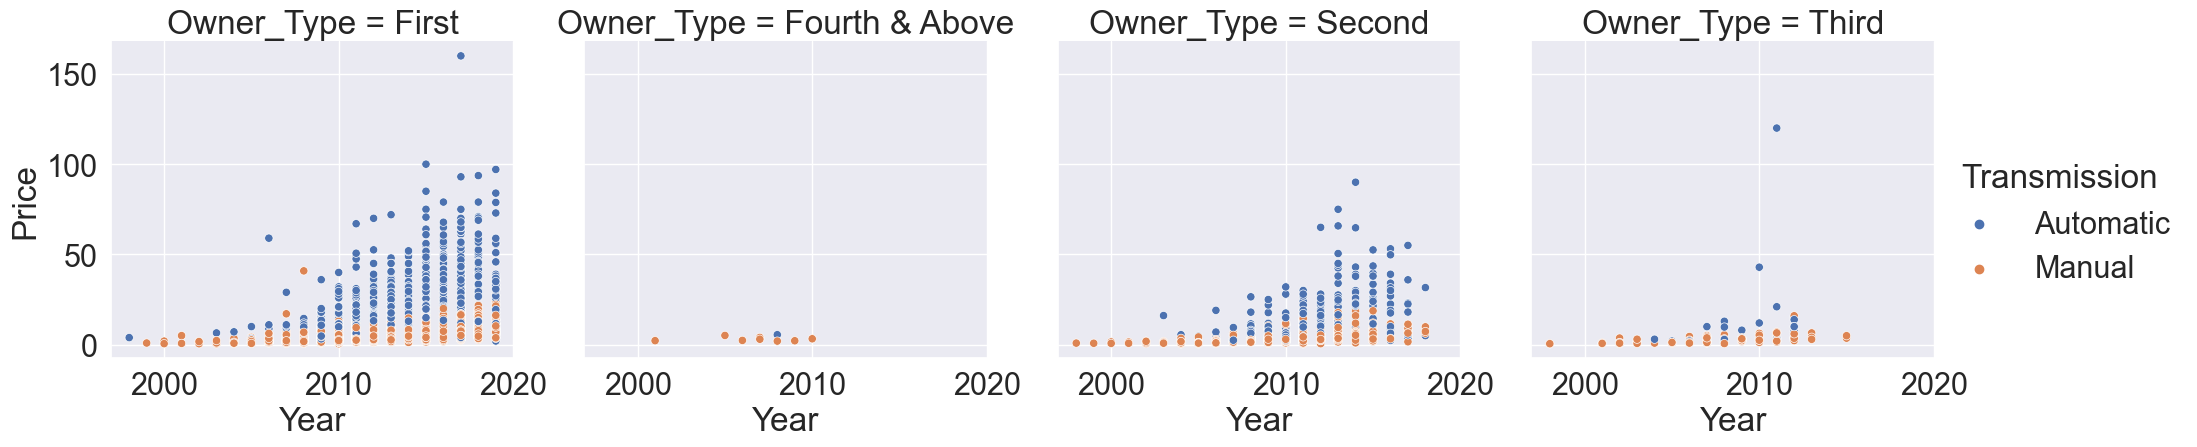

In [86]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

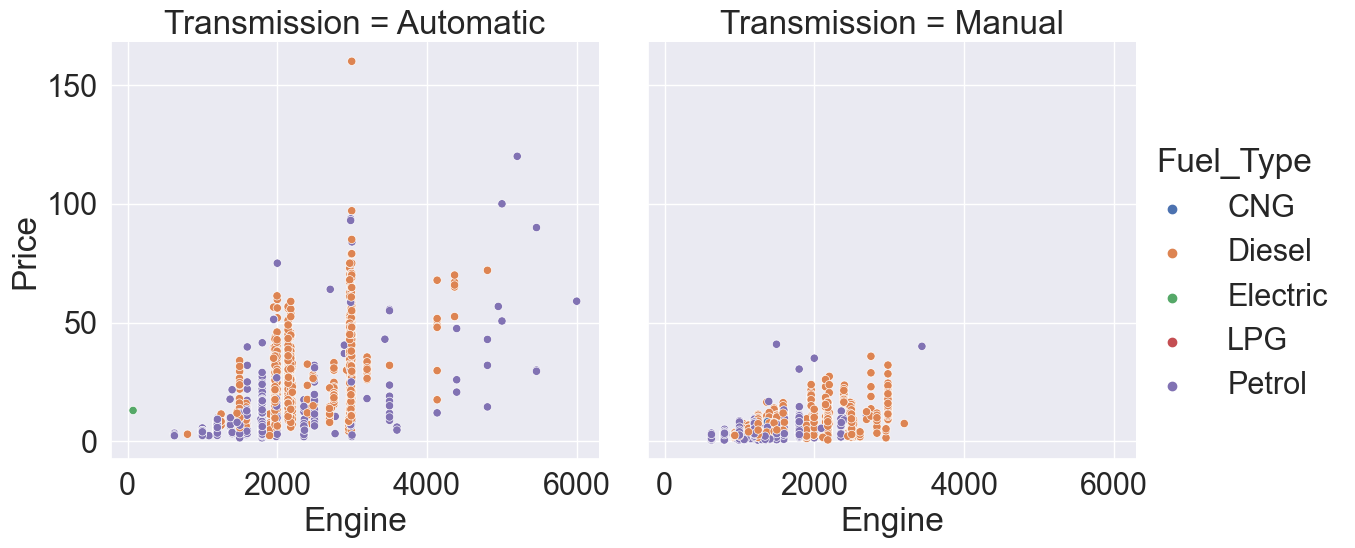

In [87]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

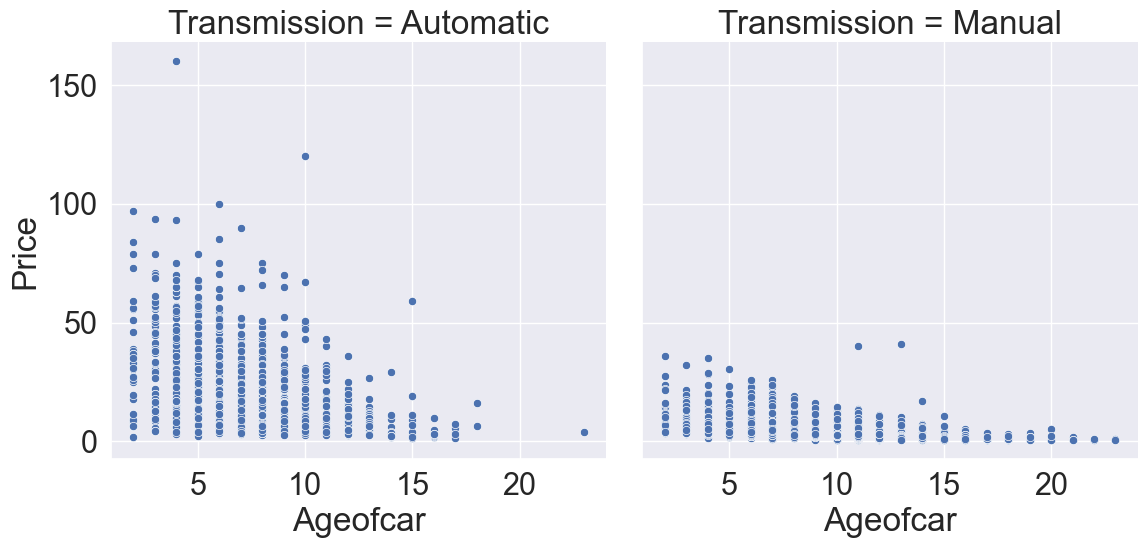

In [88]:
sns.relplot(data=cars, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6)

Observations

Expensive cars are in Coimbatore and Banglore.
2 Seater cars are more expensive.
Deisel Fuel type car are more expensive compared to other fuel type.
As expected, Older model are sold cheaper compared to latest model
Automatic transmission vehicle have a higher price than manual transmission vehicles.
Vehicles with more engine capacity have higher prices.
Price decreases as number of owner increases.
Automatic transmission require high engine and power.
Prices for Cars with fuel type as Deisel has increased with recent models
Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

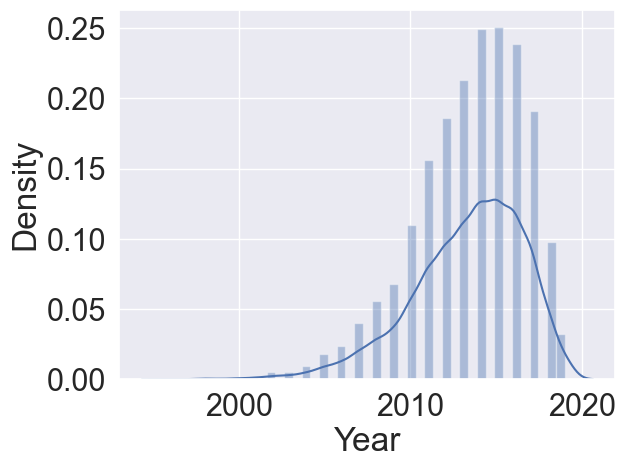

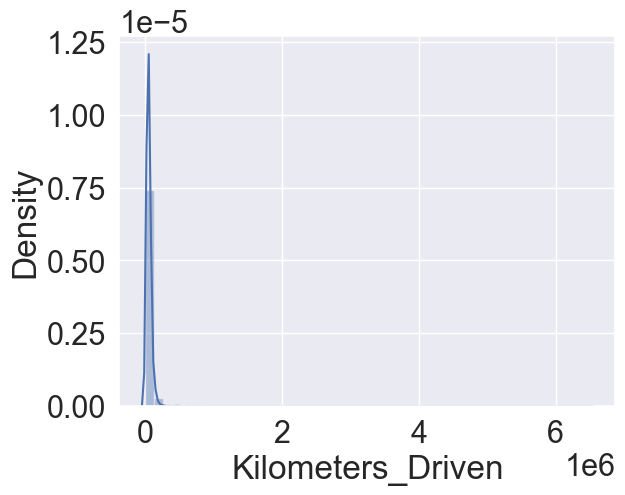

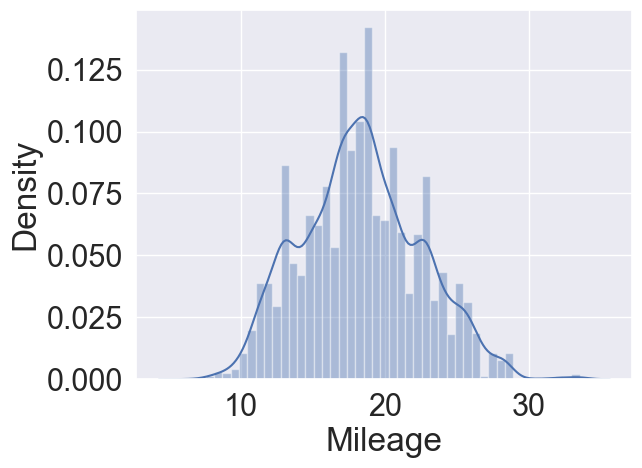

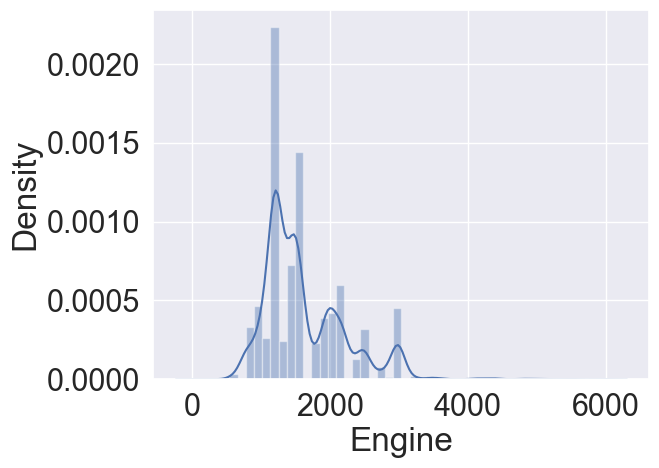

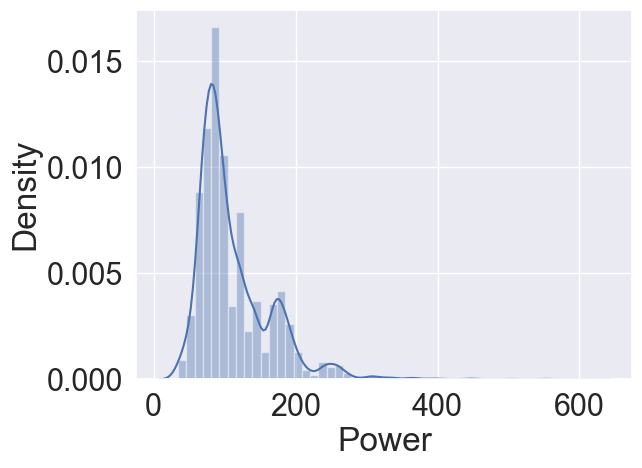

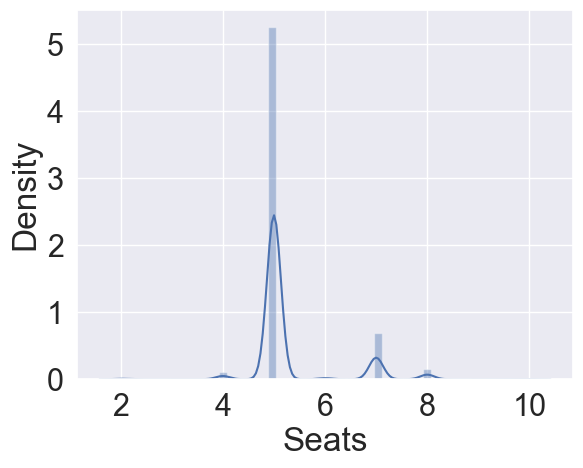

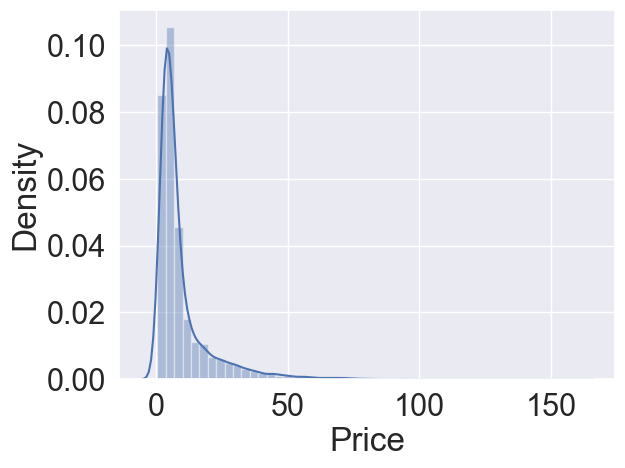

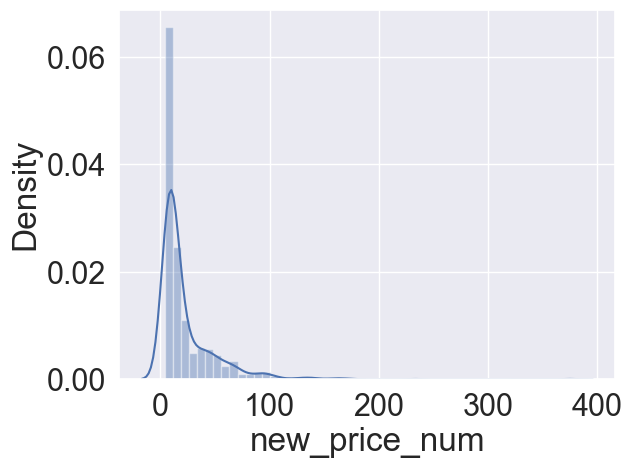

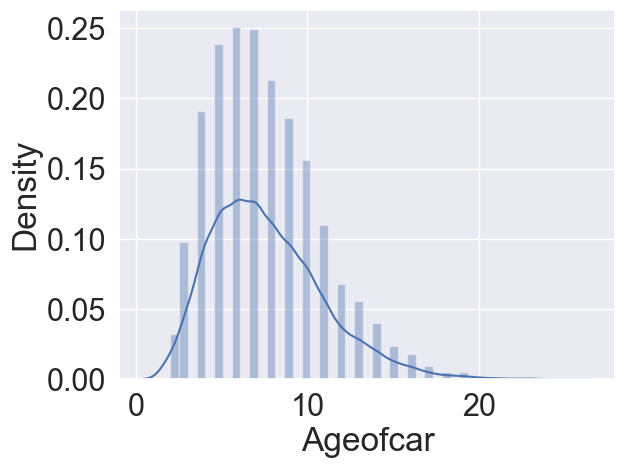

In [89]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

In [92]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [93]:
cars.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [94]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7198 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Ageofcar           7252 non-null   int64   
dtypes: category(3), float64(5), int64(2), object(2)
memory usage: 846.4+ KB
